<center><h1 class="list-group-item list-group-item-success">Diabetes Prediction</h1></center>

In [2]:
# Importing Packages
import numpy as np
import pandas as pd 
import keras

from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pycaret.classification import *
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Importing Data
df_diabetes = pd.read_csv("../input/diabetes/diabetes.csv")

In [4]:
# Data Overview
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Dataset Details
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Dataset Shape
df_diabetes.shape

(768, 9)

In [7]:
# Independent Dependent Variables Split
X = df_diabetes.drop("Outcome",axis = 1)
Y = df_diabetes["Outcome"]

In [8]:
# Train Test SPlit
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 27)

In [9]:
# Scaling
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [10]:
## NN MODEl
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

2022-02-25 18:57:46.309309: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
# Callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("val_accuracy")>0.83):
      print("Reached the accuracy required (ie) 90%", logs)
      self.model.stop_training=True
callback=myCallback()

In [12]:
# Compiling the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [13]:
# Fitting train,test data in the model
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size = 64,callbacks=[callback])

2022-02-25 18:57:47.029203: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 5.2816 - accuracy: 0.5469 - val_loss: 4.8569 - val_accuracy: 0.3594
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 5.4046 - accuracy: 0.5451 - val_loss: 1.8717 - val_accuracy: 0.5990
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 3.3598 - accuracy: 0.5903 - val_loss: 1.4550 - val_accuracy: 0.6771
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 2.8287 - accuracy: 0.5833 - val_loss: 1.3440 - val_accuracy: 0.6771
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 2.1361 - accuracy: 0.6424 - val_loss: 0.9556 - val_accuracy: 0.5729
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 1.7685 - accuracy: 0.5729 - val_loss: 0.8274 - val_accuracy: 0.6823
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 1.8570 - accuracy: 0.6372 - val_loss: 0.6687 - val_accuracy: 0.6719
Epoch 8/100
9/9 [======

In [14]:
# Model Structure Overview
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 136,193
Trainable params: 136,193
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Plotting accuracy of train,test
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

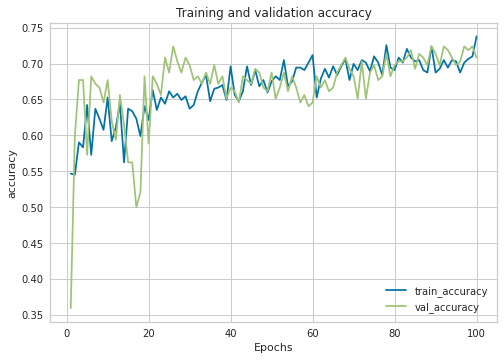

In [16]:
# Checking acccuracy graph
plot_metric(history,"accuracy")

In [17]:
# Function for traning neural network
def train_nn(test_ratio,optimizer,epochs,batch_size):
    X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size = test_ratio,random_state = 27)
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = optimizer,
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])
    history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size = batch_size,verbose=0)
    print(f"For {optimizer} with Batch Size {batch_size} \n")
    plot_metric(history,"accuracy")

For adam with Batch Size 6 



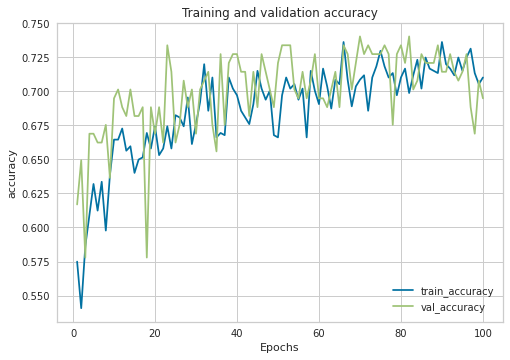

For sgd with Batch Size 6 



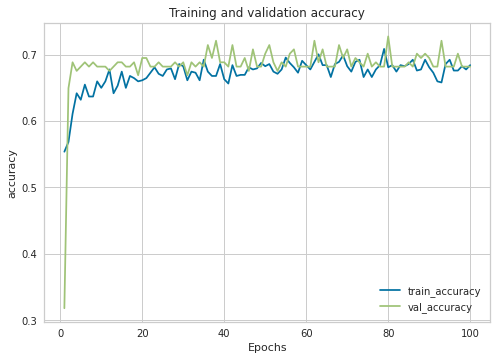

For adam with Batch Size 12 



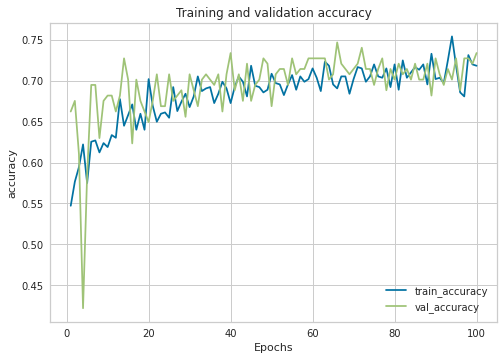

For sgd with Batch Size 12 



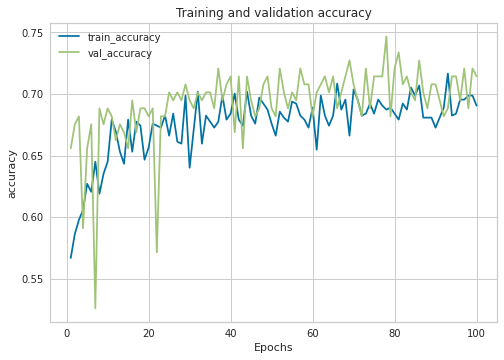

For adam with Batch Size 24 



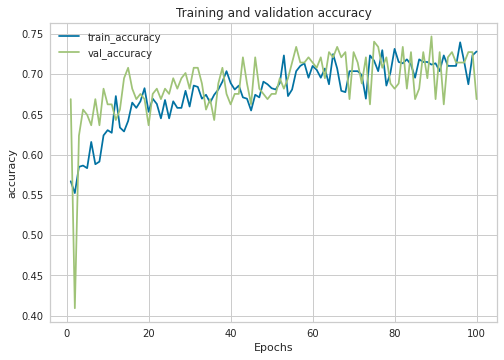

For sgd with Batch Size 24 



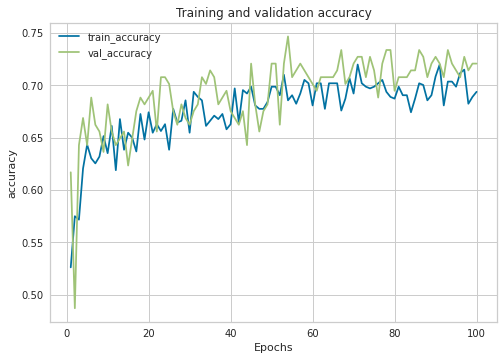

For adam with Batch Size 48 



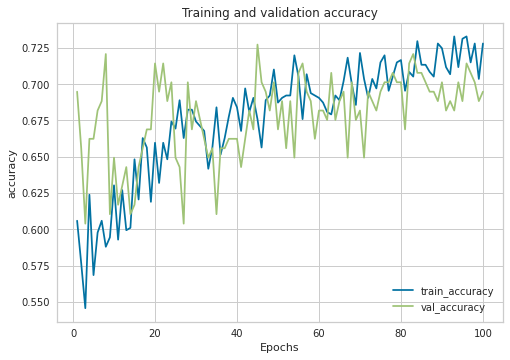

For sgd with Batch Size 48 



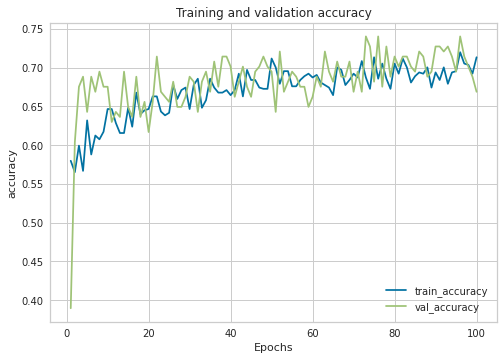

For adam with Batch Size 96 



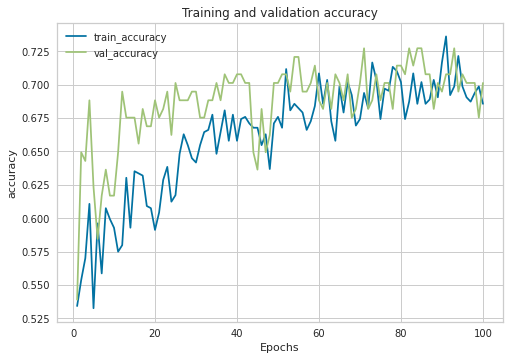

For sgd with Batch Size 96 



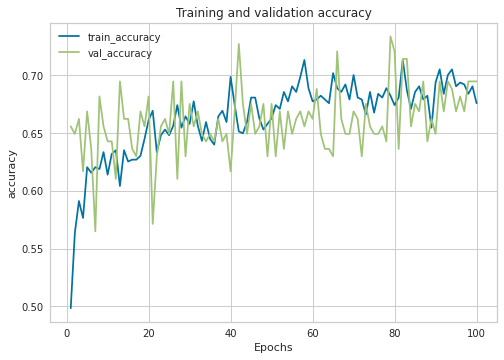

In [21]:
# Applying different optimizers with batch size
for i in (6,12,24,48,96):
    train_nn(0.2,"adam",100,i)
    train_nn(0.2,"sgd",100,i)

In [22]:
# ML models Comparison
model = setup(df_diabetes,target = "Outcome")

,Description,Value
0,session_id,1203
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
# Comparing different models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7505,0.8110,0.5437,0.7022,0.6050,0.4289,0.4408,0.4820
ridge,Ridge Classifier,0.7505,0.0000,0.5332,0.7055,0.6006,0.4261,0.4386,0.0110
lda,Linear Discriminant Analysis,0.7468,0.8092,0.5332,0.6969,0.5972,0.4191,0.4309,0.0100
gbc,Gradient Boosting Classifier,0.7427,0.7922,0.6061,0.6750,0.6277,0.4334,0.4430,0.0540
catboost,CatBoost Classifier,0.7427,0.8145,0.6008,0.6690,0.6235,0.4307,0.4390,1.0160
et,Extra Trees Classifier,0.7373,0.7812,0.5174,0.6826,0.5826,0.3973,0.4087,0.2730
rf,Random Forest Classifier,0.7354,0.8063,0.5645,0.6692,0.6025,0.4078,0.4181,0.2930
ada,Ada Boost Classifier,0.7148,0.7831,0.5534,0.6307,0.5763,0.3655,0.3757,0.0460
xgboost,Extreme Gradient Boosting,0.7036,0.7589,0.5750,0.6091,0.5814,0.3546,0.3618,15.9330
dt,Decision Tree Classifier,0.6889,0.6649,0.5803,0.5737,0.5723,0.3290,0.3325,0.0110


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1203, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)